In [1]:
from src.System import *

In [6]:
c1=grafeno3()
c2=grafeno3().mRot(11.17)
c3=grafeno3().mRot(11.17*2)
c4=grafeno3().mRot(11.17*3)

In [7]:
s1=system([c1,c2,c3,c4])

Sistema Hexagonal
Posibles Matrices de trasformación calculadas:10
Opción recomendada:
Matriz de trasformación:
	2	7
	-7	9

Sistema [Grafeno(s3),Grafeno(s3)(rot 11.17°),Grafeno(s3)(rot 22.34°),Grafeno(s3)(rot 33.51°)] 
Celda unitaria con 541 átomos:


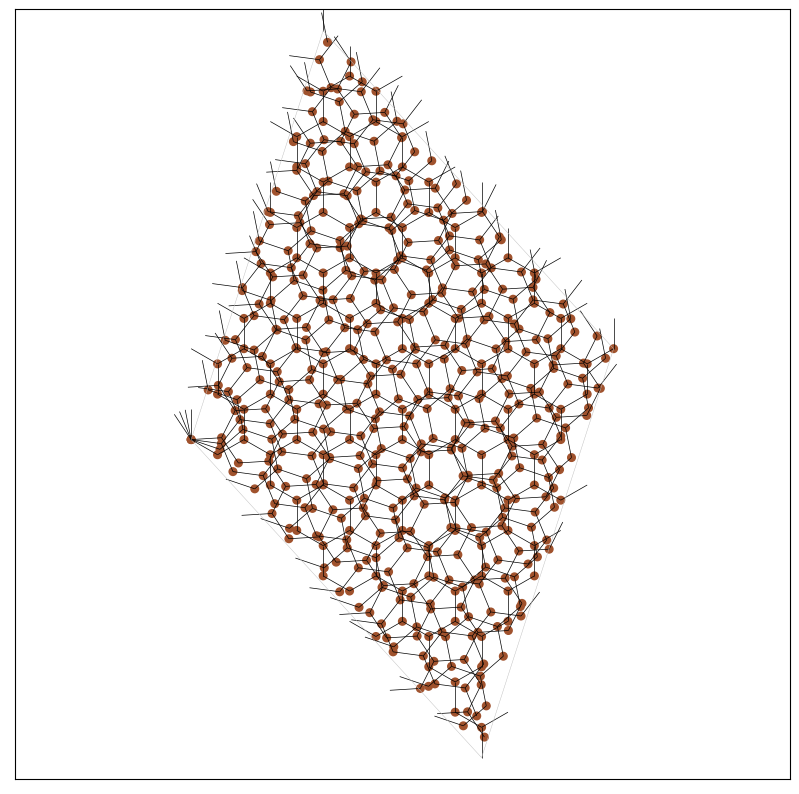

Espacio Reciproco:
Calculando...
...Pintando capa 1 (Grafeno(s3))
...Pintando capa 2 (Grafeno(s3)(rot 11.17°))
...Pintando capa 3 (Grafeno(s3)(rot 22.34°))
...Pintando capa 4 (Grafeno(s3)(rot 33.51°))
...Terminado


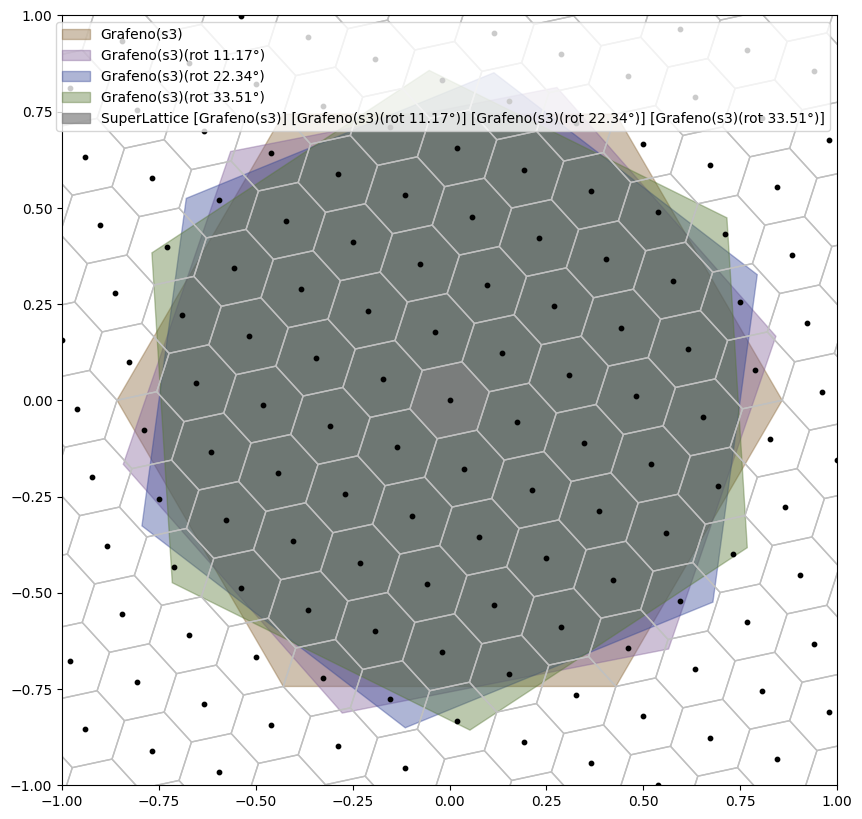

0

In [8]:
s1.muestraSR(range_search=20, eps=0.05)

Matriz de trasformación:
	4	11
	-11	15

Sistema [Grafeno(s3),Grafeno(s3)(rot 30°)] 
Celda unitaria con 724 átomos:


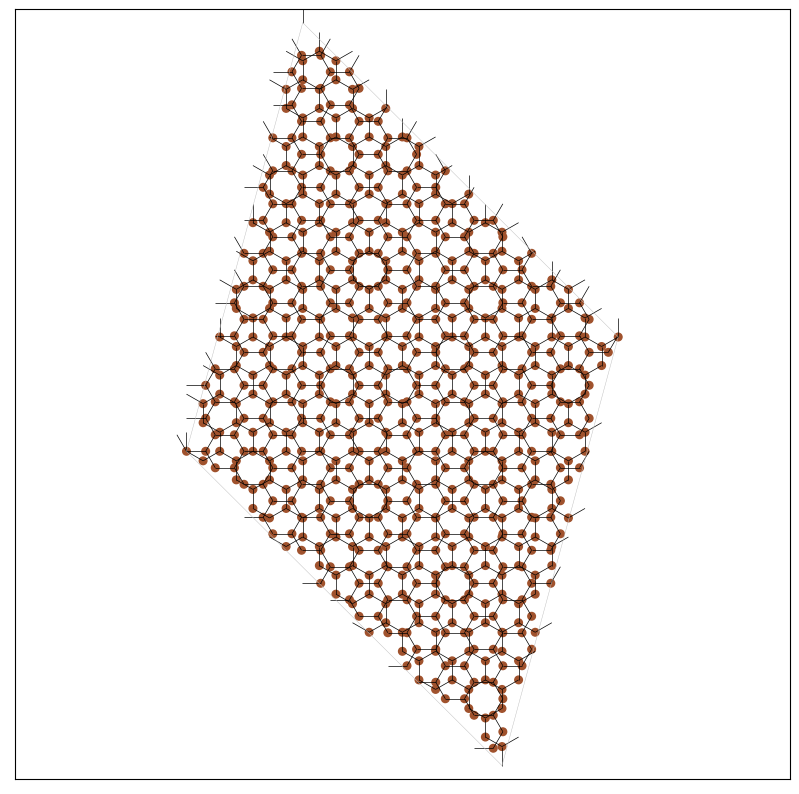

Espacio Reciproco:
Calculando...
...Pintando capa 1 (Grafeno(s3))
...Pintando capa 2 (Grafeno(s3)(rot 30°))
...Terminado


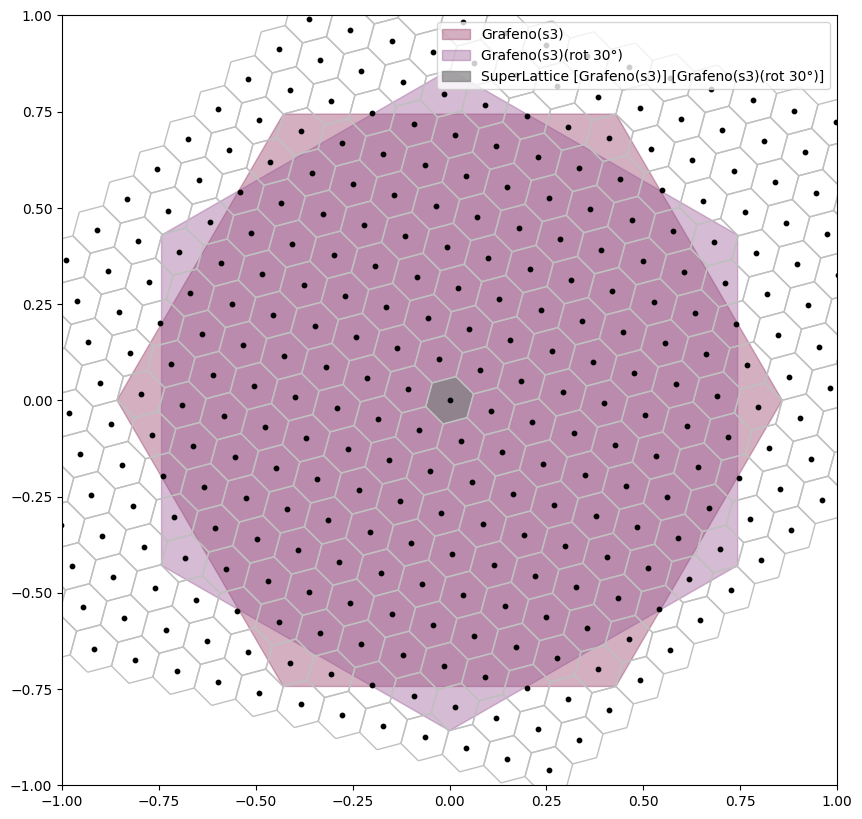

In [5]:
s1.show()

In [ ]:
s1.SuperRed.mRot(80).showXY(7,5,t=5,name='g3g3(21_78)')

In [9]:
s1.muestra()


**Opción 1. T <- Matriz loMat[0] del sistema
Tamaño de los vectores primitivos:|a|=19.9723,|b|=19.9723
Ángulo entre vectores:120.00°
+-------------------------+-------------+---------------------+-----------------+-----------------+---------+
|           Red           |      T      |     Deformación     | G de Distorsión |   delta--theta  | #Átomos |
+-------------------------+-------------+---------------------+-----------------+-----------------+---------+
|                         | |   2    7| | |     1.0      0.0| |    0.00000000   |  0.000% -- 0.0° |   134   |
|       Grafeno(s3)       | |  -7    9| | |     0.0      1.0| |                 |  0.00% -- 0.0°  |         |
|                         |             |                     |                 |                 |         |
|                         | |  -3    9| | | 1.00778  0.04544| |    0.02244783   | -3.031% -- 2.2° |   126   |
| Grafeno(s3)(rot 11.17°) | |  -9    6| | |-0.04544  1.05323| |                 | -3.031% -- 2.2

[[10, -9], [9, 1]]

In [ ]:
print(s1.SuperRed)

***La supercelda calculada está optimizada
Matriz de trasformación:
	2	7
	-7	9

Sistema [Grafeno(s3),Grafeno(s3)(rot 11.17°),Grafeno(s3)(rot 22.34°),Grafeno(s3)(rot 33.51°)] 
Celda unitaria con 522 átomos:


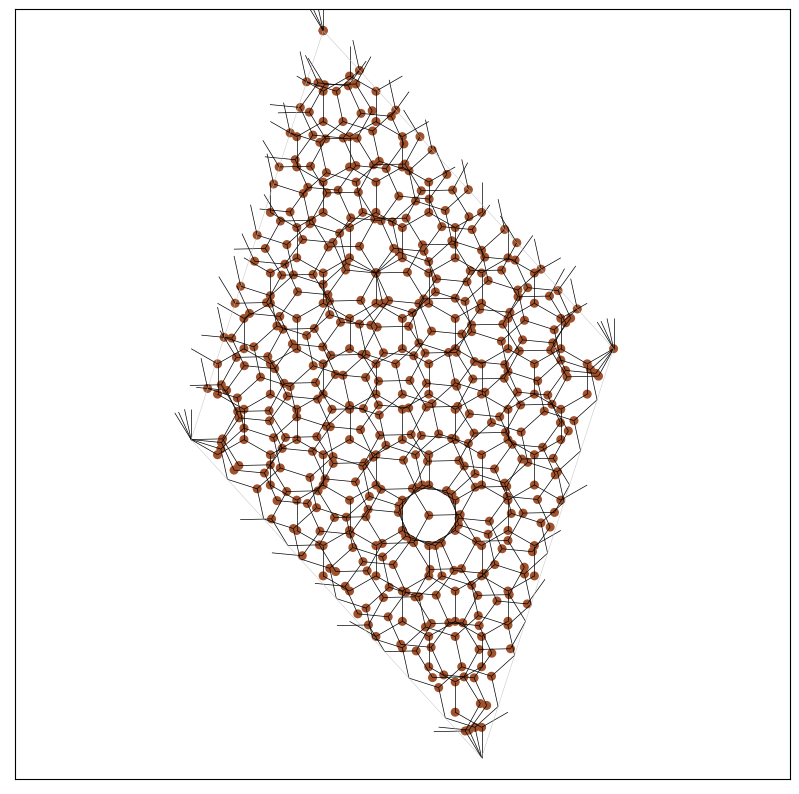

Espacio Reciproco:
Calculando...
...Pintando capa 1 (Grafeno(s3))
...Pintando capa 2 (Grafeno(s3)(rot 11.17°)(Opt))
...Pintando capa 3 (Grafeno(s3)(rot 22.34°)(Opt))
...Pintando capa 4 (Grafeno(s3)(rot 33.51°)(Opt))
...Terminado


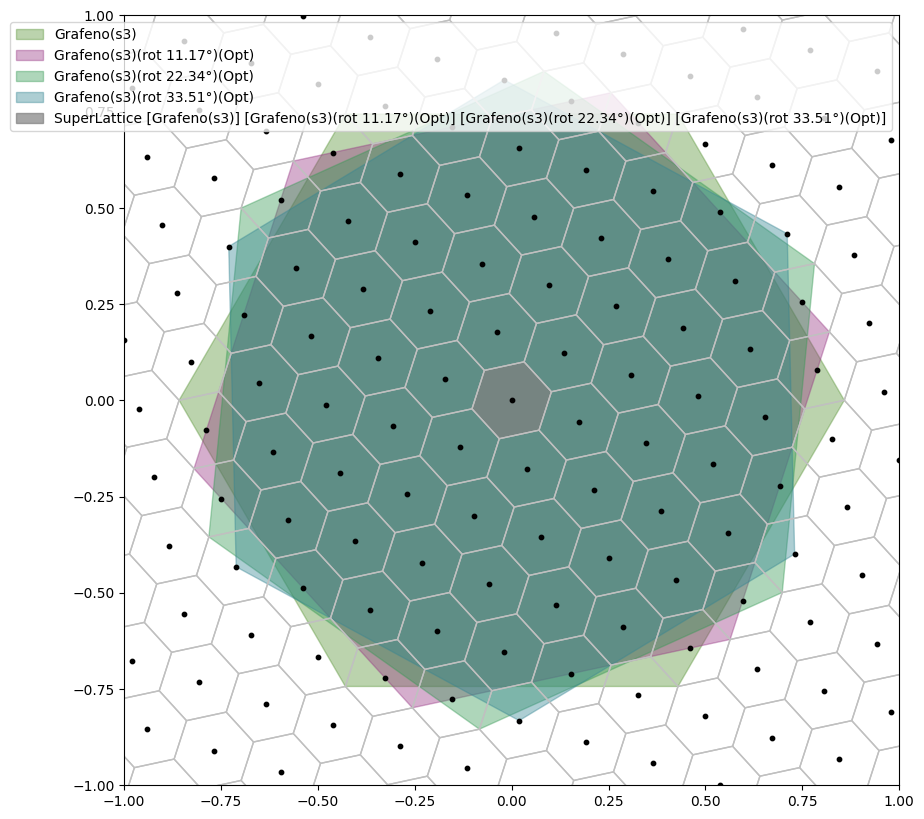

In [10]:
s2, d = s1.optimize_system(s1.loMat[0])

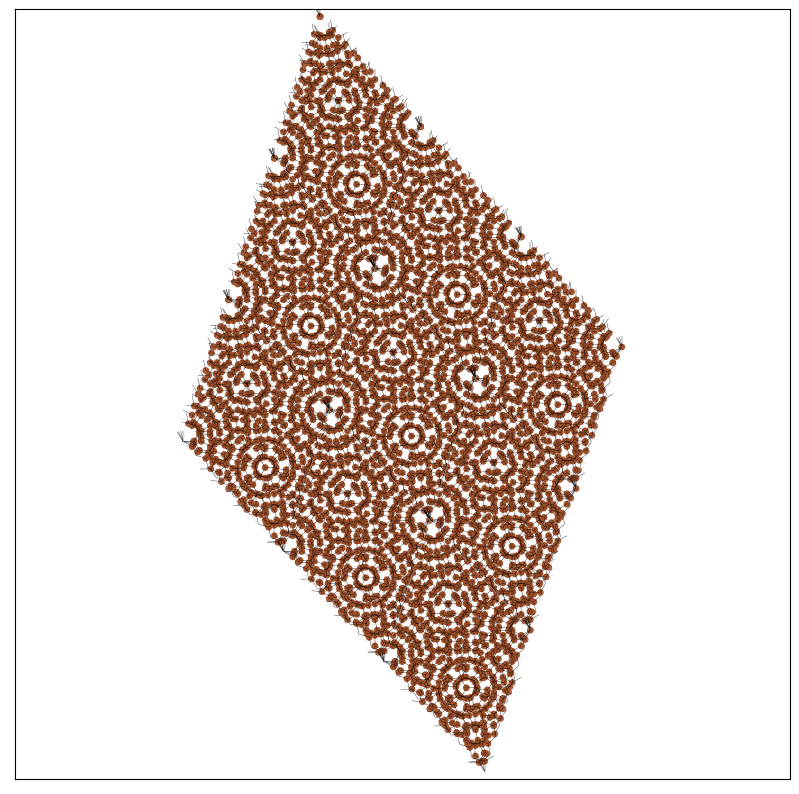

1

In [12]:
s2.SuperRed.showXY(3,3,t=5)

In [ ]:
sr1=superMesh((50,0),(0,50),s1.redes)
sr2=superMesh((50,0),(0,50),s2.redes)

In [ ]:
sr1.showXY(1,1, t=20, name='original')
sr2.showXY(1,1, t=20, name='optimizado')

In [ ]:
sr1.showXY?

In [ ]:
l=s1.SuperRed.atms[0]

In [ ]:
err=0.001
##lc=l.copy()
'''for i in range(len(l)):
    l2=l[i+1:]
    print('Distancias a',l[i],l[i].posZ)
    for a in l2:
        if a.posZ==l[i].posZ:
            (x1,y1)=l[i].pos
            (x2,y2)=a.pos
            (dx,dy)=(abs(x1-x2),abs(y1-y2))
            print("({:.4f},{:.4f})".format(dx,dy))
            if checkP(dx,err):
                print("*")
                if checkP(dy,err):
                    print("**Eliminamos A_{}**".format(i))
                    lc.remove(l[i])
                    break
len(lc)'''

def cleanA(r):
    '''
    Limpia la lista de átomos de una Red eliminando los repetidos.
    '''
    atms=r.atms
    newAtms=[]
    cont=0
    for loa in atms:
        lc=loa.copy()
        for i in range(len(loa)):
            l2 = loa[i+1:]
            for a in l2:
                if a.posZ == loa[i].posZ:
                    (x1,y1) = loa[i].pos
                    (x2,y2) = a.pos
                    if checkP((x1-x2),err):
                        if checkP((y1-y2),err):
                            cont+=1
                            lc.remove(loa[i])
                            break
        newAtms.append(lc)
    print("Se eliminaron {} átomos repetidos".format(cont))
    r.atms=newAtms
    return newAtms

In [20]:
na=cleanA(s1.SuperRed,err=0.01)
len(s1.SuperRed.atms[0])

6910

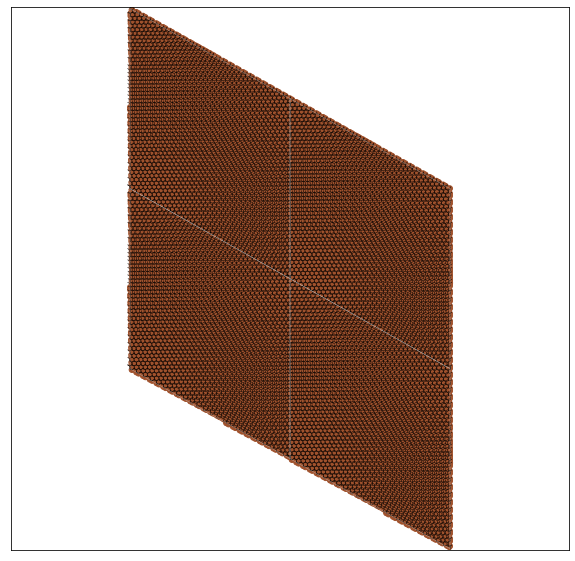

1

In [22]:
s1.SuperRed.showXY(2,2)

In [ ]:
def checkA(a, atms, err):
    '''
    Verifica si ya existe una imagen del átomo a en la lista atms 
    '''
    newlist=atms.copy()
    for at in atms:
        d=dist(a.pos,at.pos)
        if d<err:
            return False
        if abs(1-d)<err:
            return False
    return True

In [ ]:
for a in l:
    print(a)